In [28]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
fueleco = pd.read_csv("data/vehicles.csv.zip")
fueleco.sample()

/var/folders/4l/lsl149654bj_549qhcf8bysh0000gn/T/ipykernel_2834/2337876937.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv("data/vehicles.csv.zip")


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
12156,16.4805,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
fueleco.describe(include=np.number)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,39101.000000,39101.000000,39101.0,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,...,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000,39101.000000
mean,17.442712,0.219276,0.0,0.029630,18.077799,5.040648,0.569883,0.416097,0.000560,0.225181,...,22.789421,0.723139,33.884375,1.009562,2000.635406,-3459.572645,0.005869,0.094703,0.094269,0.094141
std,4.580230,1.143837,0.0,0.487408,6.970672,10.462790,4.297124,4.093495,0.045392,3.180894,...,9.827224,5.965565,10.399308,6.642943,10.690422,3010.284617,0.165399,2.279478,2.191115,2.226500
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-26500.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.370400,0.000000,1991.000000,-4750.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.111100,0.000000,33.000000,0.000000,2001.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.115000,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.475600,0.000000,38.600000,0.000000,2010.000000,-1500.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,182.700000,173.143600,2018.000000,5250.000000,7.000000,97.000000,81.000000,88.000000


In [4]:
fueleco.describe(include=object)

,drive,eng_dscr,fuelType,fuelType1,make,model,mpgData,trany,VClass,guzzler,...,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop
count,37912,23431,39101,39101,39101,39101,39101,39090,39101,2335,...,3204,1490,1485,644,8289,53,51,39101,39101,7405
unique,7,545,14,6,134,3816,2,37,34,3,...,8,4,216,125,46,5,4,195,68,2
top,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Chevrolet,F150 Pickup 2WD,N,Automatic 4-spd,Compact Cars,G,...,FFV,E85,290,288V Ni-MH,GMX,standard charger,80 amp dual charger,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,N
freq,13653,8827,25620,26931,3900,214,26400,11045,5661,1356,...,1383,1383,74,117,1255,42,42,34199,29438,5176


In [5]:
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

## Categorical data

In [6]:
cat_cols = fueleco.select_dtypes(object).columns
cat_cols

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [7]:
fueleco.drive.nunique()

7

In [8]:
fueleco.drive.sample(3, random_state=42)

4217     4-Wheel or All-Wheel Drive
1736     4-Wheel or All-Wheel Drive
36029              Rear-Wheel Drive
Name: drive, dtype: object

In [9]:
fueleco.drive.isna().sum()

1189

In [10]:
fueleco.drive.isna().mean() * 100

3.0408429451932175

In [11]:
fueleco.drive.value_counts()

Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: drive, dtype: int64

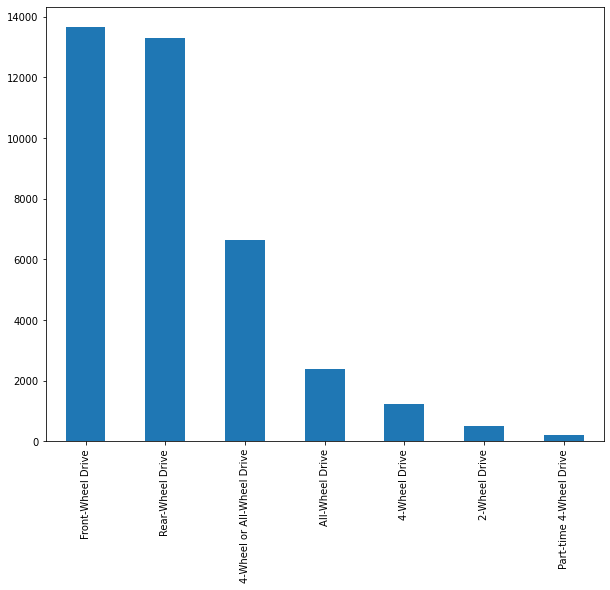

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.drive.value_counts().plot.bar(ax=ax)

<AxesSubplot:xlabel='count', ylabel='make'>

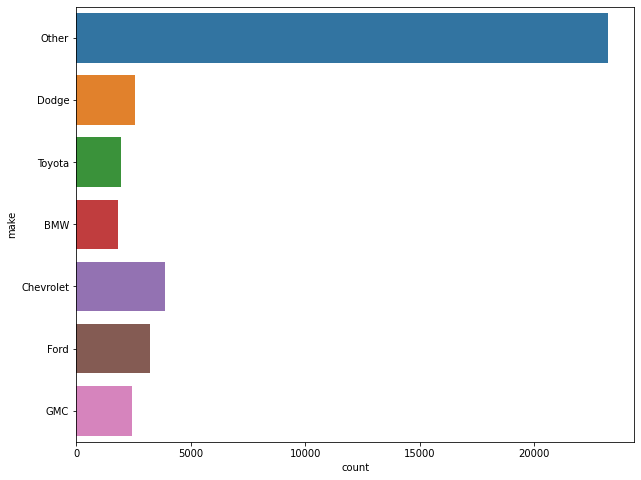

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.make.value_counts().index[:6]
sns.countplot(
    y="make",
    data=(
        fueleco.assign(
            make=fueleco.make.where(
                fueleco.make.isin(top_n), "Other"
            )
        )
    ),
)

## Continuous data

In [14]:
fueleco.select_dtypes("number")

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-1750,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-10500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,250,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-10500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-4750,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39096,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-1500,0.0,0,0,0
39097,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-1000,0.0,0,0,0
39098,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0
39099,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1750,0.0,0,0,0


In [15]:
fueleco.city08.sample(3, random_state=42)

4217     11
1736     21
36029    16
Name: city08, dtype: int64

In [16]:
fueleco.city08.isna().sum()

0

In [17]:
fueleco.city08.isna().mean() * 100

0.0

In [18]:
fueleco.city08.describe()

count    39101.000000
mean        18.077799
std          6.970672
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

<AxesSubplot:>

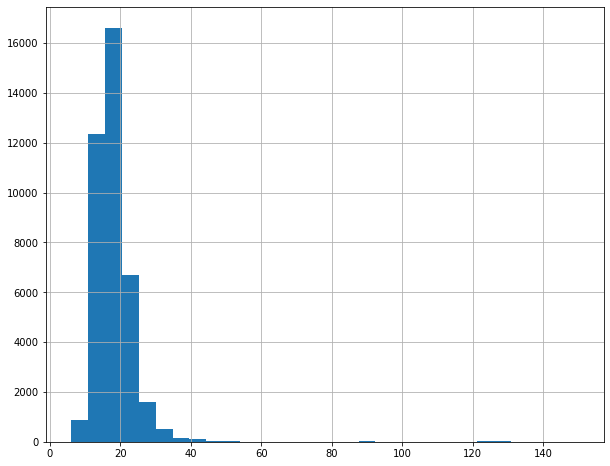

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.city08.hist(ax=ax, bins=30)

/Users/steyn/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/steyn/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city08', ylabel='Density'>

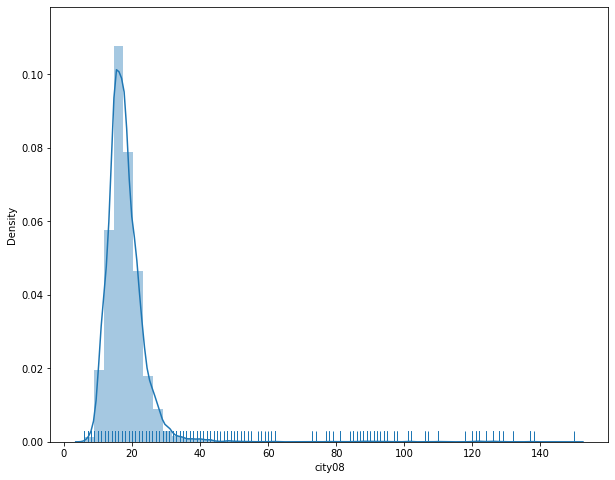

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(fueleco.city08, rug=True, ax=ax)

In [21]:
stats.kstest(fueleco.city08, cdf="norm")

KstestResult(statistic=0.9999999990134123, pvalue=0.0)

((array([-4.1352692 , -3.92687024, -3.81314873, ...,  3.81314873,
          3.92687024,  4.1352692 ]),
  array([  6,   6,   6, ..., 137, 138, 150])),
 (5.385946629915974, 18.077798521776934, 0.772587941459713))

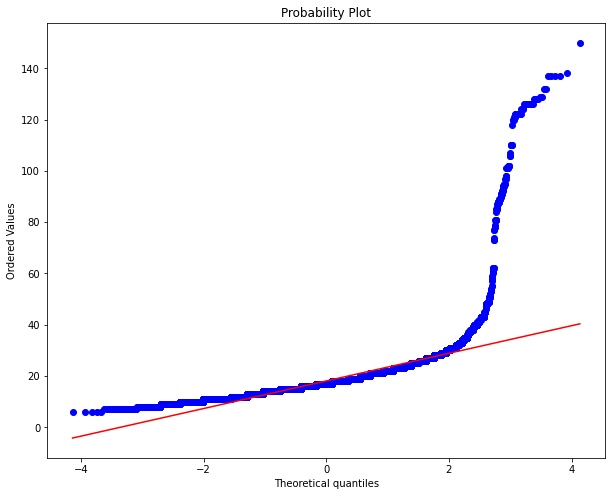

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco.city08, plot=ax)

## Comparing continuous values across categories

In [23]:
mask = fueleco.make.isin(["Ford", "Honda", "Tesla", "BMW"])
fueleco[mask].groupby("make").city08.agg(["mean", "std"])

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


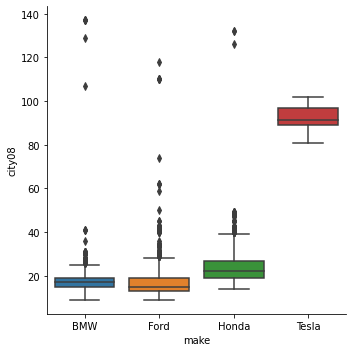

In [32]:
sns.catplot(
    x="make", y="city08", data=fueleco[mask], kind="box"
)

<AxesSubplot:xlabel='make', ylabel='city08'>

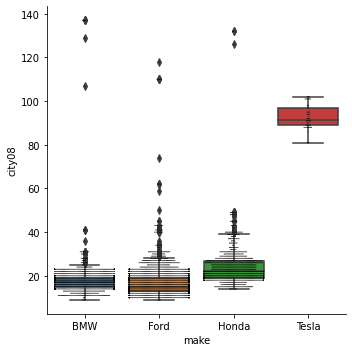

In [33]:
g = sns.catplot(
    x="make", y="city08", data=fueleco[mask], kind="box"
)
sns.swarmplot(
    x="make",
    y="city08",
    data=fueleco[mask],
    color="k",
    size=1,
    ax=g.ax
)

In [ ]:
fueleco[mask].groupby()